In [36]:
# ignore this setup line

%matplotlib inline

# Basic pandas and matplotlib visualization of climate data

This will be the same as the previous exercise of visualizing climate change data. Except we will use the pandas library for data wrangling. It's a heavy library with additional syntax and conventions to memorize. But its conveniences are worth it, when it comes to dealing with numerical datasets.

Pay attention to how the steps differ between pandas and loading data the old-fashioned way (with CSV deserialization). The concepts are the same, but the process will hopefully be a little less tedious.

Here's the import statement for __pandas__ -- it's a popular convention to alias it to `pd`:

In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
# if you are interactively coding, remember to include:
# %matplotlib


# Loading the data


If you've cloned this repo and have the data folder locally:


In [26]:
from os.path import join
fname = join('data', 'climate', 'nasa-gistemp-annual-mean.csv')
# note we haven't read anything yet...

Or, if you're too lazy to clone the repo and just want to pull down the data file remotely:

fname = 'https://raw.githubusercontent.com/datademofun/matplotlibsampler/master/data/climate/nasa-gistemp-annual-mean.csv'


## Reading csvs with pandas

pandas has a super-convenient `read_csv()` function that will open a data file and parse it, all in one step -- whether it's a local filename or a remote URL:


In [27]:
df = pd.read_csv(fname)

What does `df` stand for? You'll see that in a lot of pandas example as an abbreviation for __DataFrame__.

Go ahead and inspect the DataFrame object with its built-in `head()` and `tail()` methods:

In [28]:
df.head()

,year,annual_mean
0,1880,-0.49
1,1881,-0.47
2,1882,-0.38
3,1883,-0.39
4,1884,-0.67


In [29]:
df.tail()

,year,annual_mean
131,2011,0.81
132,2012,0.80
133,2013,0.84
134,2014,0.90
135,2015,1.01


Let's skip over the details of what a DataFrame is and just get right to charting.

Actually, there's one detail we should care about: one of __pandas__'s main powers is to let us work with datasets as vectors. For our current purposes, this means we can trivially pass data-by-columns into plotting methods:

<Container object of 136 artists>

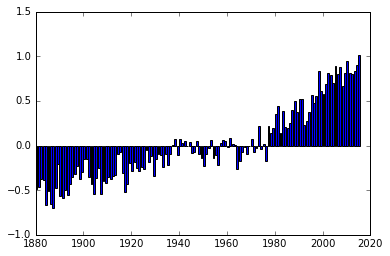

In [30]:
fig, ax = plt.subplots()
ax.bar(df['year'], df['annual_mean'])

(remember all those for-loops/list-comprehensions we had to perform when doing things without pandas?)

Apparently, pandas will conveniently type cast data when the DataFrame is created -- that is, the `annual_mean` column is seen as being a series of float numbers, not just string objects:

In [31]:
type(df['annual_mean'])

pandas.core.series.Series

In [32]:
df['annual_mean'].dtype

dtype('float64')

All right, let's create the variation of the temperature chart in which temperature increases are shaded in orange, and temperature decreases in blue; and note the conciseness of the code:

<Container object of 56 artists>

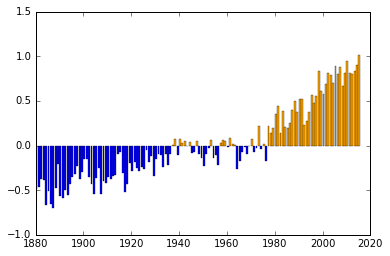

In [33]:
fig, ax = plt.subplots()
colds = df[df['annual_mean'] <= 0]
hots = df[df['annual_mean'] > 0]
ax.bar(colds['year'], colds['annual_mean'], color='blue', linewidth=0.3)
ax.bar(hots['year'], hots['annual_mean'], color='orange', linewidth=0.3)

OK, one more variation/rip-off of the Economist. In their version of the chart, they put special emphasis on the 15 hottest years:


![economist graph](http://cdn.static-economist.com/sites/default/files/imagecache/original-size/images/2016/01/blogs/graphic-detail/20160123_woc185_0.png)


That's easy enough for us. Repeat the code from our previous attempt, but add in a __third__ call to `bar()`, this time, with the subset of the dataframe `df` that contains only the 15 hottest temperatures.

We get that subset by using the DataFrame's [sort_values()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values) method, chained with a call to `head()`:


<Container object of 56 artists>

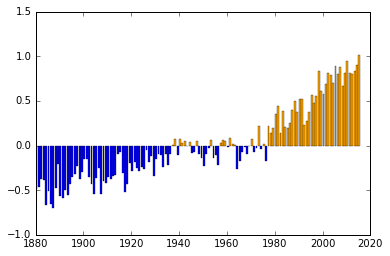

In [34]:
fig, ax = plt.subplots()
colds = df[df['annual_mean'] <= 0]
hots = df[df['annual_mean'] > 0]
ax.bar(colds['year'], colds['annual_mean'], color='blue', linewidth=0.3)
ax.bar(hots['year'], hots['annual_mean'], color='orange', linewidth=0.3)


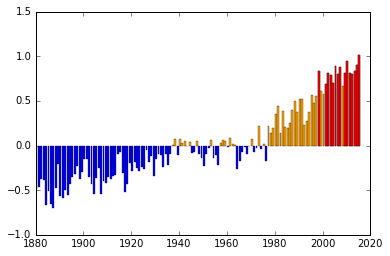

In [35]:
fig, ax = plt.subplots()

colds = df[df['annual_mean'] <= 0]
hots = df[df['annual_mean'] > 0]
hottest = df.sort_values('annual_mean', ascending=False).head(15)

ax.bar(colds['year'], colds['annual_mean'], color='blue', linewidth=0.3)
ax.bar(hots['year'], hots['annual_mean'], color='orange', linewidth=0.3)
ax.bar(hottest['year'], hottest['annual_mean'], color='red', linewidth=0.3);


There's a lot of complexity to pandas, especially if you've never used R or have ever taken a math class that involved vectorization. However, for some of our routine data visualization and wrangling tasks, learning a little bit of pandas can go a long way.